In [1]:
from CosinorPy import file_parser, cosinor, cosinor1, cosinor_nonlin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate test data

In [2]:
df = file_parser.generate_test_data(phase = 0, n_components = 1, name="test5", lin_comp = 0.1, noise=0.5, replicates = 3, independent=False)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="test6", lin_comp = 0, noise=0.5, replicates = 3, independent=False)
df = df.append(df2, ignore_index=True)

df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="test7", amplification = -0.04, noise=0.5, replicates = 3, time_step=1,  max_time = 72, independent=False)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="test8", amplification = 0.04, noise=0.5, replicates = 3, time_step=1, max_time = 72, independent=False)
df = df.append(df2, ignore_index=True)

In [3]:
#df = file_parser.read_excel("test_data\\data.xlsx", independent=False)

## Cosinor analysis

Identify the best models and/or the best periods (possible periods can be given as an interval or as a single value).

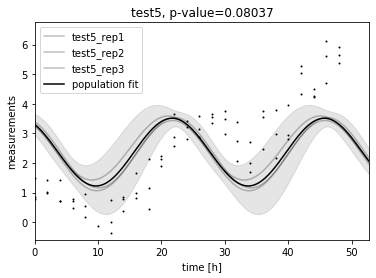

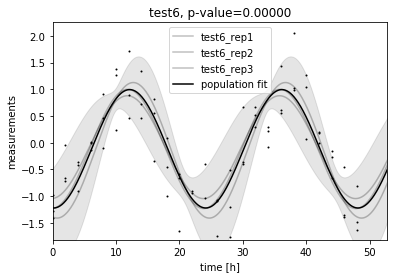

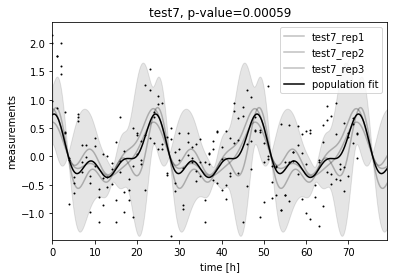

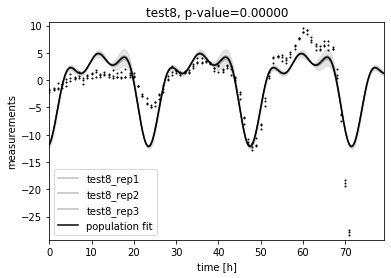

In [4]:
df_results = cosinor.population_fit_group(df, n_components = [1,2,3,4], period=24, plot=False)
df_best_models = cosinor.get_best_models_population(df, df_results, n_components = [1,2,3,4])
cosinor.plot_df_models_population(df, df_best_models)

Obviously, some of these fits could be better by introducing linear component and/or amplification coefficient.

## Generalized population cosinor1 analysis

First, we will use a single-component model. Using these functions, only 1-component models can be used, but richer statistics can be obtained.

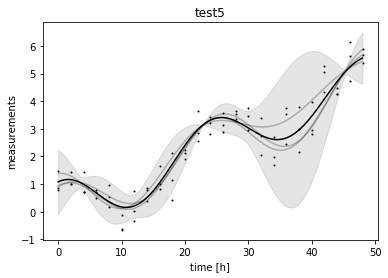

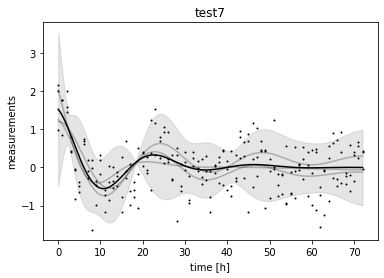

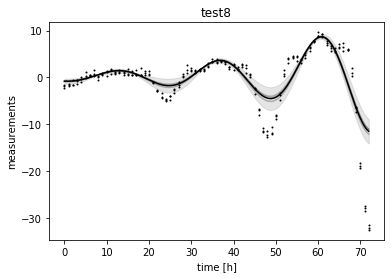

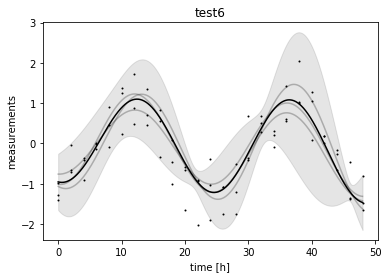

In [5]:
df_results = cosinor_nonlin.population_fit_generalized_cosinor_group(df, period=24, plot=True)

In [6]:
df_results

,test,period,p,q,p_reject,q_reject,amplitude,p(amplitude),q(amplitude),CI(amplitude),...,q(acrophase),CI(acrophase),amplification,p(amplification),q(amplification),CI(amplification),lin_comp,p(lin_comp),q(lin_comp),CI(lin_comp)
0,test5,24.0,1.110223e-16,1.480297e-16,1.000000,1.0,1.056048,0.035191,0.046921,"[0.18038607031902731, 1.9317102105223571]",...,0.617219,"[-0.4232387703149899, 0.28454794765652724]",-0.004917,0.762603,0.762603,"[-0.06612798716517726, 0.05629441010545606]",0.098044,0.002328,0.009311,"[0.07765524567077164, 0.11843205764284256]"
1,test7,24.0,3.120837e-13,3.120837e-13,0.952595,1.0,1.432186,0.055484,0.055484,"[-0.08312095759846261, 2.947493405658129]",...,0.617219,"[-0.45925553858570817, 0.60406477792185]",-0.072529,0.217383,0.434765,"[-0.24804873871378258, 0.10299048436759194]",-0.001461,0.432339,0.432339,"[-0.00790660478199743, 0.004984916793017162]"
2,test8,24.0,1.110223e-16,1.480297e-16,1.000000,1.0,0.805460,0.010979,0.043915,"[0.43931386648662674, 1.171606842344989]",...,0.000051,"[3.029583239671531, 3.124125596520165]",0.037904,0.001285,0.005138,"[0.032053041907667744, 0.04375479438041665]",0.011387,0.107119,0.214239,"[-0.006084743527872884, 0.028859259041610002]"
3,test6,24.0,1.110223e-16,1.480297e-16,0.314210,1.0,1.037411,0.027596,0.046921,"[0.28014585630328404, 1.7946761625464713]",...,0.001530,"[2.6647671100181207, 3.385037499682022]",0.004313,0.528181,0.704241,"[-0.020207056422907207, 0.028832520484739704]",-0.005701,0.381169,0.432339,"[-0.02771642236508394, 0.016315110662893664]"


## Comparison analysis using generalized population cosinor1

The generalised 1-component cosinor model can also be used to compare pairs in a similar way as the basic 1-component model. First we need to define the pairs to compare:

In [7]:
pairs = [("test5", "test6"),("test7", "test8")]

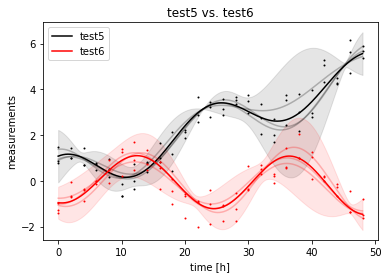

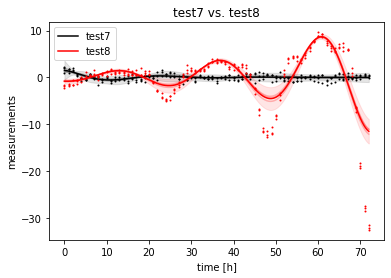

,test,period1,period2,d_amplitude,p(d_amplitude),q(d_amplitude),CI(d_amplitude),d_acrophase,p(d_acrophase),q(d_acrophase),CI(d_acrophase),d_amplification,p(d_amplification),q(d_amplification),CI(d_amplification),d_lin_comp,p(d_lin_comp),q(d_lin_comp),CI(d_lin_comp)
0,test5 vs. test6,24.0,24.0,-0.018637,0.963284,0.963284,"[-1.075109644057184, 1.0378353820655546]",3.094248,0.000049,0.000049,"[2.633476895547742, 3.5550185368108633]",0.009230,0.579488,0.579488,"[-0.03332043442943361, 0.0517794755509873]",-0.103744,0.000462,0.000924,"[-0.13112730410703735, -0.07636131090876713]"
1,test7 vs. test8,24.0,24.0,-0.626726,0.158723,0.317446,"[-1.6326738227599913, 0.3792220835319404]",3.004450,0.000017,0.000034,"[2.660023105951734, 3.348876490903821]",0.110433,0.053780,0.107560,"[-0.002890356780191561, 0.2237564474144666]",0.012848,0.041209,0.041209,"[0.0008308814026014247, 0.02486532210011596]"


In [8]:
cosinor_nonlin.population_fit_generalized_cosinor_compare_pairs(df, pairs, period1=24, period2=24, plot=True)


## Generalized multicomponent population cosinor analysis
A better fit would be obtained in some cases (e.g., test7 and test8) if a multicomponent cosinor model would be used. 

We can use a wrapper function that automatically identifies the optimal number of components for each dataset, and plots and stores the results in a data frame.

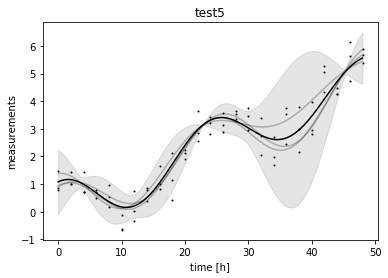

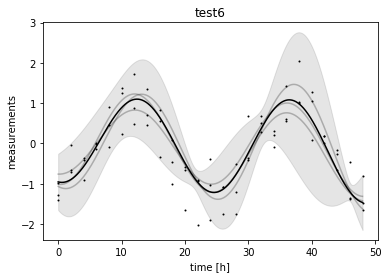

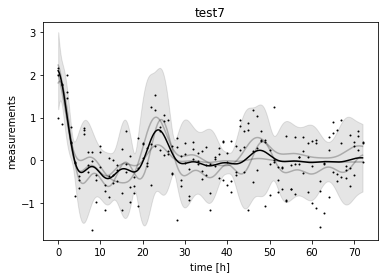

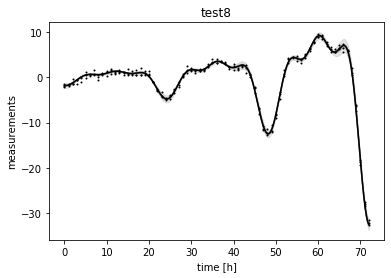

In [9]:
df_best_models = cosinor_nonlin.population_fit_generalized_cosinor_n_comp_group_best(df, period=24, n_components=[1,2,3,4], plot=True)

In [10]:
df_best_models

,test,period,n_components,p,q,p_reject,q_reject,RSS,amplitude,acrophase,...,troughs,heights2,amplification,p(amplification),q(amplification),CI(amplification),lin_comp,p(lin_comp),q(lin_comp),CI(lin_comp)
0,test5,24.0,1.0,1.110223e-16,1.480297e-16,1.00000,1.0,19.350304,1.056046,-0.075474,...,[12.252252252252251],[-1.0317320985460787],-0.004917,0.762603,0.762603,"[-0.06612798716517726, 0.05629441010545606]",0.098044,0.002328,0.009311,"[0.07765524567077164, 0.11843205764284256]"
1,test6,24.0,1.0,1.110223e-16,1.480297e-16,0.31421,1.0,18.610883,1.037409,3.025237,...,[0.43243243243243246],[-0.9612529012335284],0.004313,0.528181,0.704241,"[-0.020207056422907207, 0.028832520484739704]",-0.005701,0.381169,0.541257,"[-0.02771642236508394, 0.016315110662893664]"
2,test7,24.0,3.0,2.220446e-16,2.220446e-16,1.00000,1.0,63.618069,1.438523,0.031447,...,"[5.573573573573573, 11.963963963963964, 18.066...","[-0.3856277203791753, -0.7761115987922816, -0....",-0.046571,0.148246,0.296493,"[-0.13373023113972854, 0.04058730070472272]",-0.001161,0.405943,0.541257,"[-0.005942288643453504, 0.0036209957234236726]"
3,test8,24.0,3.0,1.110223e-16,1.480297e-16,1.00000,1.0,53.235508,1.328316,3.125869,...,[],[],0.039964,0.000333,0.001331,"[0.03682665654055887, 0.04310122978446624]",0.000151,0.835143,0.835143,"[-0.002591324730017374, 0.0028925978156479543]"


Alternatively, we can also fix the number of components to the same value for all datasets:

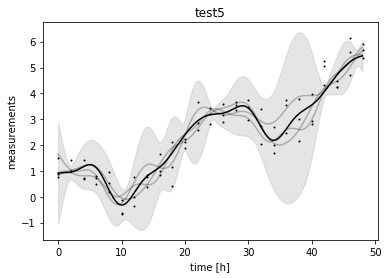

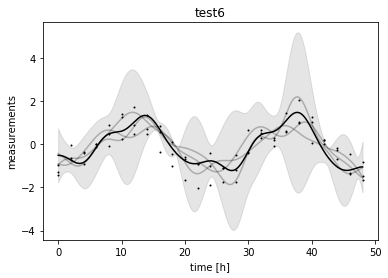

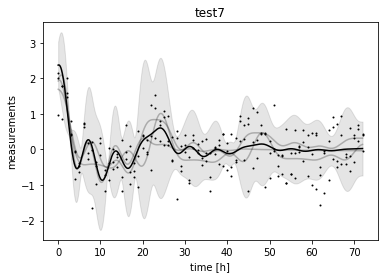

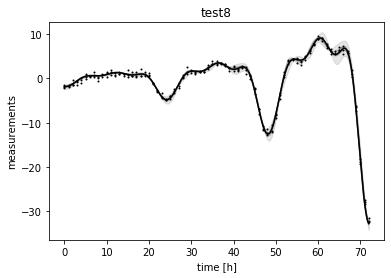

In [11]:
df_4comp_models = cosinor_nonlin.population_fit_generalized_cosinor_n_comp_group(df, period=24, n_components = 4, plot=True)

In [12]:
df_4comp_models

,test,period,n_components,p,q,p_reject,q_reject,RSS,amplitude,acrophase,...,troughs,heights2,amplification,p(amplification),q(amplification),CI(amplification),lin_comp,p(lin_comp),q(lin_comp),CI(lin_comp)
0,test5,24.0,4.0,1.110223e-16,1.480297e-16,NaN,NaN,18.279277,1.160011,0.182395,...,[10.378378378378379],[-1.3865606830324153],-0.004764,0.755311,0.755311,"[-0.062194575023715906, 0.05266714105716121]",0.098309,0.001751,0.007003,"[0.0805863317487656, 0.11603093324426693]"
1,test6,24.0,4.0,8.237855e-14,8.237855e-14,NaN,NaN,20.463459,1.062842,2.710764,...,"[3.315315315315315, 21.42942942942943]","[-0.8463202417532565, -0.6502339393213079]",0.007777,0.593391,0.755311,"[-0.045387171657472705, 0.0609413801176583]",-0.005747,0.280951,0.561902,"[-0.022644557328428173, 0.011151340505352356]"
2,test7,24.0,4.0,1.110223e-16,1.480297e-16,1.0,NaN,67.634689,2.021379,-0.088053,...,"[4.516516516516517, 10.57057057057057, 16.6246...","[-0.7154743406724255, -1.6328891574450985, -1....",-0.058504,0.238922,0.477844,"[-0.21020732128652006, 0.09319934572931618]",-0.000906,0.524557,0.699410,"[-0.006004241188318229, 0.004192909879294459]"
3,test8,24.0,4.0,1.110223e-16,1.480297e-16,1.0,NaN,55.876716,1.328261,3.088132,...,[23.975975975975977],[-1.8409106261200625],0.040009,0.000171,0.000684,"[0.037756781489040464, 0.04226057441378529]",0.000252,0.713194,0.713194,"[-0.002312795029465863, 0.002817644559646842]"


## Comparison using generalized multicomponent cosinor analysis
Only the basic analysis is provided here... First, we need to define the pairs to compare:

In [13]:
pairs = [("test5", "test6"),("test7", "test8")]

Then, we can run the analysis. For each measurement, the number of components and period are taken from the `df_best_models` argument. 

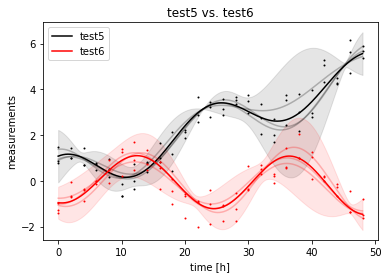

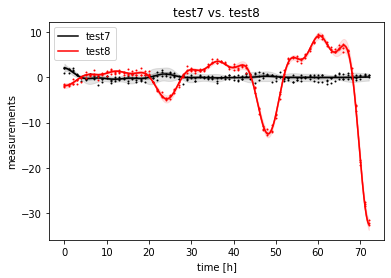

In [14]:
df_compare = cosinor_nonlin.population_compare_pairs_n_comp_group(df, pairs, df_best_models=df_best_models, plot=True)

In [15]:
df_compare

,test,period1,period2,n_components1,n_components2,d_amplitude,d_acrophase,d_amplification,p(d_amplification),q(d_amplification),CI(d_amplification),d_lin_comp,p(d_lin_comp),q(d_lin_comp),CI(d_lin_comp)
0,test5 vs. test6,24.0,24.0,1.0,1.0,-0.018637,3.100711,0.009230,0.579488,0.579488,"[-0.03332043442943361, 0.0517794755509873]",-0.103744,0.000462,0.000924,"[-0.13112730410703735, -0.07636131090876713]"
1,test7 vs. test8,24.0,24.0,3.0,3.0,-0.110207,3.094422,0.086535,0.012959,0.025918,"[0.03025658201094704, 0.1428142347490839]",0.001311,0.363897,0.363897,"[-0.0022455560805264116, 0.004868122086186822]"


If `df_best_models` is not specified, `n_components` is used for all the fits.

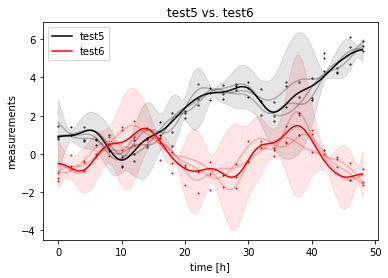

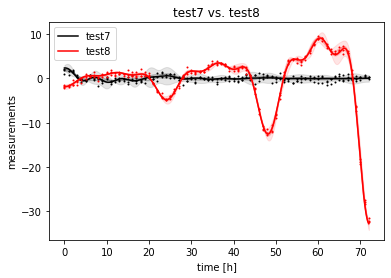

In [16]:
df_compare4 = cosinor_nonlin.population_compare_pairs_n_comp_group(df, pairs, n_components=4, period=24, plot=True)

In [17]:
df_compare4

,test,period1,period2,n_components1,n_components2,d_amplitude,d_acrophase,d_amplification,p(d_amplification),q(d_amplification),CI(d_amplification),d_lin_comp,p(d_lin_comp),q(d_lin_comp),CI(d_lin_comp)
0,test5 vs. test6,24.0,24.0,4.0,4.0,-0.097169,2.528369,0.012541,0.651395,0.651395,"[-0.05887784793335812, 0.08395949036009842]",-0.104055,0.000206,0.000413,"[-0.12640156400654723, -0.0817089178095611]"
1,test7 vs. test8,24.0,24.0,4.0,4.0,-0.693118,-3.107001,0.098513,0.049124,0.098249,"[0.0006097192868008, 0.19641561217322884]",0.001158,0.431921,0.431921,"[-0.0025248993117556536, 0.0048410801509604015]"
